In [9]:
#Load libraries
import numpy as np
import matplotlib.pyplot as plt
import glob
import moviepy.editor as mpy

## Create data and model to animate

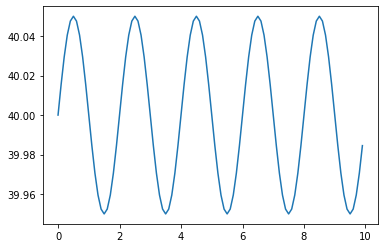

In [10]:
#Let us animate a RV curve
#Let us write a function to compute RV for a circular orbit
#input parameters are time t (vector with N elements)
#and the model parameters
#in this case
#params[0] -> vz -> Systemic velocity of the star
#params[1] -> K  -> Doppler semi-amplitude
#params[2] -> P  -> Orbital period
#params[3] -> T0 -> time of minimum conjunction 
#This function returns a vector (N elements) of RVs at the times t
def calcula_RV(t,params):
    vz = params[0]
    K  = params[1]
    P  = params[2]
    t0 = params[3]
    vr = vz - K * np.sin(2*np.pi*(t-t0)/P)
    return vr

#Let us check if the function works by plotting an RV curve

#let us create a time vector between 0 and 10 days with a point each 0.1 days
t = np.arange(0,10,0.1)
#Let us give some values for the 4 parameters that define the RV of a circular orbit
vz = 40 #km/s
K = 0.05#km/s
P = 2   #days
t0 = 13 #days

#Let us call the function to estimate the RV for a circular orbit
rv = calcula_RV(t,[vz,K,P,t0])
#Now we have a vector vr that contains the RV of our fictional star at the times t
plt.plot(t,rv)

#NOTE: If you want to know how the curve changes with different values
#I encourage you to modify the parameters and see how the plot changes
#this will give you a better idea of how the equation works ;-)

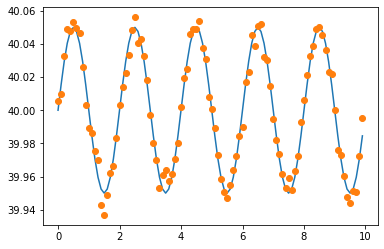

In [11]:
#Now we can create some mock data by adding some white noise to the previously computed RVs
#Let us create an error bar of 5 m/d
rv_err = 5e-3
#Create RV data
rv_data = np.random.normal(rv,rv_err)
#Let us plot the model and the data together
plt.plot(t,rv)
plt.plot(t,rv_data,'o')

## Animation time!

In [15]:
#Let us create a function to create a plot
#tmodel -> time-stamps of the model
#model  -> model values corresponding to tmodel
#tdata  -> time-stamps of the data
#data   -> model values corresponding to tdata
#fname  -> name of the output file
def plot_data(tmodel,model,tdata,data,fname):
    #This is exactly a matplotlib plotting routine 
    plt.figure(1,figsize=(8,4))
    plt.xlabel('Time (days)')
    plt.ylabel('RV (km/s)')
    plt.plot(tmodel,model)
    plt.plot(tdata,data,'o')
    plt.savefig(fname,dpi=150,bbox_inches='tight')

#create a cycle that creates our plots
#In this case, each plot will show all the data and the model will appear one step each time
for i in range(len(t)):
    #Create the filename automatically
    fname = 'rv_'+str(i).zfill(5)+'.png'
    #Create the plot
    plot_data(t[:i],rv[:i],t,rv_data,fname)
    plt.close()
    
#this will create a bunch of png files that we will use to create the animation
#It might take time, be patient 

### Now we have the plots, let us create the animations

In [21]:
print('Creating animation')

#name of the animation
gif_name = 'rv_animation'

#fotograms per second
fps = 24

#Create a list with all the png files in our directory
file_list = sorted(glob.glob('*.png')) # Get all the pngs in the current directory

#Create a clip instance using ImageSequenceClip included in moviepy
clip = mpy.ImageSequenceClip(file_list, fps=fps)

#No we can write the animation as a a gif...
clip.write_gif(gif_name+'.gif')

#or as a mp4
clip.write_videofile(gif_name+'.mp4')

print('Your animation is ready!')                                                                   

Creating animation


t:   3%|▎         | 3/100 [00:00<00:03, 27.51it/s, now=None]

MoviePy - Building file rv_animation.gif with imageio.


t:   6%|▌         | 6/100 [00:00<00:01, 51.77it/s, now=None] 

Moviepy - Building video rv_animation.mp4.
Moviepy - Writing video rv_animation.mp4



Moviepy - Done !
Moviepy - video ready rv_animation.mp4
Your animation is ready!
